In [78]:
import pandas as pd
import numpy as np

import re
import os
import json

from konlpy.tag import Okt

# preprocessing

In [79]:
whole_reviews = pd.read_csv('./lec_review.csv')
sw_reviews = pd.read_csv('./sw_lec_review.csv')

In [80]:
display(whole_reviews.shape)
display(whole_reviews.head())

(1400, 3)

,review,star,pos_neg
0,전공 두개 합친만큼 신경써야 점수가 나오는 신기한 강의,2,neg
1,재수강하러갑니다.시험 대부분 문제가 주관식으로 나오는데 구절 빈칸넣기라던가 스토리보...,1,neg
2,성적 너그러이주심. 강의력은 조금부족하긴한데 설명잘해주심,3,mid
3,1. 수강 자체는 굉장히 편함2. 기말고사는 어려운데 패스 자체에 영향을 미치진 않는듯,4,pos
4,1. 교수님이 인도사 전공으로 사실상 쟁점인도사2. 과제가 소소하게 많지만 어렵거나...,5,pos


In [81]:
display(sw_reviews.shape)
display(sw_reviews.head())

(486, 3)

,과목명,교수명,강의평
0,Capstone디자인(산학협력프로젝트),"권기학, 문현준",보고서가 많은편이긴한데학점은퍼주네요 굳
1,C프로그래밍및실습,김도년,수업끝나고 수업시간에 진행한 코드작성 못하면 남아서 될냐까지 해야함 그런거 빼고 낫...
2,C프로그래밍및실습,김도년,실습끝까지 남기시는 거 뺴곤 아주좋으심 너그러우신편
3,C프로그래밍및실습,김도년,교수님 엄청 친절하시고 귀여우셔요..과제만열심히 제때제때하면 되니까 그거만으로도 충...
4,C프로그래밍및실습,김도년,교수님 과제많아서 시험준비는 과제한거 복습하면됨. 귀여우심


In [82]:
sw_reviews.columns = ['lecture', 'professor', 'review']
sw_reviews.head()

,lecture,professor,review
0,Capstone디자인(산학협력프로젝트),"권기학, 문현준",보고서가 많은편이긴한데학점은퍼주네요 굳
1,C프로그래밍및실습,김도년,수업끝나고 수업시간에 진행한 코드작성 못하면 남아서 될냐까지 해야함 그런거 빼고 낫...
2,C프로그래밍및실습,김도년,실습끝까지 남기시는 거 뺴곤 아주좋으심 너그러우신편
3,C프로그래밍및실습,김도년,교수님 엄청 친절하시고 귀여우셔요..과제만열심히 제때제때하면 되니까 그거만으로도 충...
4,C프로그래밍및실습,김도년,교수님 과제많아서 시험준비는 과제한거 복습하면됨. 귀여우심


In [83]:
def text_preprocessing(review, okt, remove_stopwords=False, stop_words = []) -> str:
    review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', ' ', review)
    text_morpheme = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        word_review = [token for token in text_morpheme if not token in stop_words]
        
    return word_review

In [84]:
okt = Okt()
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들', '의', '되',
                 '수', '보', '주', '등', '한', '님', '도'])

whole_clean_reviews = []
sw_clean_reviews = []

for review in whole_reviews['review']:
    whole_clean_reviews.append(text_preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
    
for review in sw_reviews['review']:
    sw_clean_reviews.append(text_preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))

In [85]:
print(whole_clean_reviews[:5])
print(sw_clean_reviews[:5])

[['전공', '두', '개', '합치다', '신경', '써다', '점수', '나오다', '신기하다', '강의'], ['재수강', '하다', '가다', '시험', '대부분', '문제', '주관', '식', '으로', '나오다', '구절', '빈칸', '넣기', '라던가', '스토리', '보다는', '세다', '내용', '알다', '풀다'], ['성적', '너그럽다', '주심', '강의', '력', '조금', '부족하다', '설명', '잘해주다', '심'], ['수강', '자체', '굉장하다', '편하다', '기말고사', '어렵다', '패스', '자체', '에', '영향', '을', '미치다', '않다'], ['교수', '인도', '사', '전공', '으로', '사실', '상', '쟁점', '인', '도사', '과제', '소소하다', '많다', '어렵다', '시간', '많이', '오래', '과제', '아니다']]
[['보고서', '많다', '편이', '기다', '학점', '퍼', '주네', '요', '굳다'], ['수업', '끝나다', '수업', '시간', '에', '진행', '코드', '작성', '못', '하다', '남아', '서', '되다', '까지', '하다', '함', '그렇다', '빼다', '낫밷'], ['실습', '끝', '까지', '남다', '거', '뺴곤', '아주', '좋다', '심', '너그럽다', '편'], ['교수', '엄청', '친절하다', '귀엽다', '과제', '만', '열심히', '제때', '제때', '면', '되다', '그거', '만으로도', '충분하다', '실력', '올리다', '있다'], ['교수', '과제', '많다', '시험', '준비', '과제', '거', '복습', '하다', '되다', '귀', '여우', '심']]


In [86]:
whole_reviews['clean_review'] = whole_clean_reviews
sw_reviews['clean_review'] = sw_clean_reviews

display(whole_reviews.head())
display(sw_reviews.head())

,review,star,pos_neg,clean_review
0,전공 두개 합친만큼 신경써야 점수가 나오는 신기한 강의,2,neg,"[전공, 두, 개, 합치다, 신경, 써다, 점수, 나오다, 신기하다, 강의]"
1,재수강하러갑니다.시험 대부분 문제가 주관식으로 나오는데 구절 빈칸넣기라던가 스토리보...,1,neg,"[재수강, 하다, 가다, 시험, 대부분, 문제, 주관, 식, 으로, 나오다, 구절,..."
2,성적 너그러이주심. 강의력은 조금부족하긴한데 설명잘해주심,3,mid,"[성적, 너그럽다, 주심, 강의, 력, 조금, 부족하다, 설명, 잘해주다, 심]"
3,1. 수강 자체는 굉장히 편함2. 기말고사는 어려운데 패스 자체에 영향을 미치진 않는듯,4,pos,"[수강, 자체, 굉장하다, 편하다, 기말고사, 어렵다, 패스, 자체, 에, 영향, ..."
4,1. 교수님이 인도사 전공으로 사실상 쟁점인도사2. 과제가 소소하게 많지만 어렵거나...,5,pos,"[교수, 인도, 사, 전공, 으로, 사실, 상, 쟁점, 인, 도사, 과제, 소소하다..."


,lecture,professor,review,clean_review
0,Capstone디자인(산학협력프로젝트),"권기학, 문현준",보고서가 많은편이긴한데학점은퍼주네요 굳,"[보고서, 많다, 편이, 기다, 학점, 퍼, 주네, 요, 굳다]"
1,C프로그래밍및실습,김도년,수업끝나고 수업시간에 진행한 코드작성 못하면 남아서 될냐까지 해야함 그런거 빼고 낫...,"[수업, 끝나다, 수업, 시간, 에, 진행, 코드, 작성, 못, 하다, 남아, 서,..."
2,C프로그래밍및실습,김도년,실습끝까지 남기시는 거 뺴곤 아주좋으심 너그러우신편,"[실습, 끝, 까지, 남다, 거, 뺴곤, 아주, 좋다, 심, 너그럽다, 편]"
3,C프로그래밍및실습,김도년,교수님 엄청 친절하시고 귀여우셔요..과제만열심히 제때제때하면 되니까 그거만으로도 충...,"[교수, 엄청, 친절하다, 귀엽다, 과제, 만, 열심히, 제때, 제때, 면, 되다,..."
4,C프로그래밍및실습,김도년,교수님 과제많아서 시험준비는 과제한거 복습하면됨. 귀여우심,"[교수, 과제, 많다, 시험, 준비, 과제, 거, 복습, 하다, 되다, 귀, 여우, 심]"


In [87]:
# pos_neg: mid change to neg
whole_reviews.replace({'pos_neg', 'mid'}, 'neg', inplace=True)
whole_reviews.head()

,review,star,pos_neg,clean_review
0,전공 두개 합친만큼 신경써야 점수가 나오는 신기한 강의,2,neg,"[전공, 두, 개, 합치다, 신경, 써다, 점수, 나오다, 신기하다, 강의]"
1,재수강하러갑니다.시험 대부분 문제가 주관식으로 나오는데 구절 빈칸넣기라던가 스토리보...,1,neg,"[재수강, 하다, 가다, 시험, 대부분, 문제, 주관, 식, 으로, 나오다, 구절,..."
2,성적 너그러이주심. 강의력은 조금부족하긴한데 설명잘해주심,3,neg,"[성적, 너그럽다, 주심, 강의, 력, 조금, 부족하다, 설명, 잘해주다, 심]"
3,1. 수강 자체는 굉장히 편함2. 기말고사는 어려운데 패스 자체에 영향을 미치진 않는듯,4,pos,"[수강, 자체, 굉장하다, 편하다, 기말고사, 어렵다, 패스, 자체, 에, 영향, ..."
4,1. 교수님이 인도사 전공으로 사실상 쟁점인도사2. 과제가 소소하게 많지만 어렵거나...,5,pos,"[교수, 인도, 사, 전공, 으로, 사실, 상, 쟁점, 인, 도사, 과제, 소소하다..."


In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
whole_reviews['pos_neg'] = le.fit_transform(whole_reviews['pos_neg'])
whole_reviews.head()

,review,star,pos_neg,clean_review
0,전공 두개 합친만큼 신경써야 점수가 나오는 신기한 강의,2,0,"[전공, 두, 개, 합치다, 신경, 써다, 점수, 나오다, 신기하다, 강의]"
1,재수강하러갑니다.시험 대부분 문제가 주관식으로 나오는데 구절 빈칸넣기라던가 스토리보...,1,0,"[재수강, 하다, 가다, 시험, 대부분, 문제, 주관, 식, 으로, 나오다, 구절,..."
2,성적 너그러이주심. 강의력은 조금부족하긴한데 설명잘해주심,3,0,"[성적, 너그럽다, 주심, 강의, 력, 조금, 부족하다, 설명, 잘해주다, 심]"
3,1. 수강 자체는 굉장히 편함2. 기말고사는 어려운데 패스 자체에 영향을 미치진 않는듯,4,1,"[수강, 자체, 굉장하다, 편하다, 기말고사, 어렵다, 패스, 자체, 에, 영향, ..."
4,1. 교수님이 인도사 전공으로 사실상 쟁점인도사2. 과제가 소소하게 많지만 어렵거나...,5,1,"[교수, 인도, 사, 전공, 으로, 사실, 상, 쟁점, 인, 도사, 과제, 소소하다..."


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(whole_reviews['clean_review'], whole_reviews['pos_neg'],
                                                    test_size=0.2, random_state=42)

In [90]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

clean_train_reviews = list(X_train)
clean_test_reviews = list(X_test)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)

X_train_sequences = tokenizer.texts_to_sequences(clean_train_reviews)
X_test_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_sequences = tokenizer.texts_to_sequences(sw_clean_reviews)

In [91]:
word_vocab = tokenizer.word_index

MAX_SEQUENCE_LENGTH = 125 # mean

train_inputs = pad_sequences(X_train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
train_labels = np.array(y_train)

test_inputs = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_labels = np.array(y_test)

In [92]:
DATA_IN_PATH = './'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TEST_INPUT_DATA = 'test_input.npy'
TEST_LABEL_DATA = 'test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

# DL model

In [93]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [94]:
DATA_OUT_PATH = './'
INPUT_TRAIN_DATA = 'train_input.npy'
LABEL_TRAIN_DATA = 'train_label.npy'
INPUT_TEST_DATA = 'test_input.npy'
LABEL_TEST_DATA = 'test_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_IN_PATH + INPUT_TRAIN_DATA, 'rb'), allow_pickle=True)
train_input = pad_sequences(train_input, maxlen=train_input.shape[1])

train_label = np.load(open(DATA_IN_PATH + LABEL_TRAIN_DATA, 'rb'), allow_pickle=True)
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS))

In [95]:
model_name = 'cnn_classifier'
BATCH_SIZE = 512
NUM_EPOCHS = 3
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name, 
         'vocab_size': prepro_configs['vocab_size'], 
         'embedding_size': 128, 
         'num_filters': 100, 
         'dropout_rate': 0.5, 
         'hidden_dimension': 250, 
         'output_dimension': 1}

In [96]:
from tensorflow.keras.layers import Dense, Dropout, Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.constraints import MaxNorm

class CNNClassifier(tf.keras.Model):
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = Embedding(input_dim=kargs['vocab_size'],
                                  output_dim=kargs['embedding_size'])
        self.conv_list = [Conv1D(filters=kargs['num_filters'],
                                kernel_size=kernel_size,
                                padding='valid',
                                activation='relu',
                                kernel_constraint=MaxNorm(max_value=3.))
                         for kernel_size in [3,4,5]]
        self.max_pooling = GlobalMaxPooling1D()
        self.dropout = Dropout(kargs['dropout_rate'])
        self.fc1 = Dense(units=kargs['hidden_dimension'],
                        activation='relu', kernel_constraint=MaxNorm(max_value=3.))
        self.fc2 = Dense(units=kargs['output_dimension'],
                        activation='sigmoid', kernel_constraint=MaxNorm(max_value=3.))
        
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.max_pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

In [97]:
clf = CNNClassifier(**kargs)

clf.compile(optimizer=tf.keras.optimizers.Adam(), 
            loss=tf.keras.losses.BinaryCrossentropy(), 
            metrics=[tf.keras.metrics.BinaryAccuracy(name='Accuracy')])

In [98]:
# overfitting 방지
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=1)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

# 모델 학습
history = clf.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                  validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

clf.save_weights(checkpoint_path)

./cnn_classifier -- Folder already exists 

Epoch 1/3
2/2 [==============================] - 1s 379ms/step - loss: 0.6648 - Accuracy: 0.6587 - val_loss: 0.6347 - val_Accuracy: 0.6786
Epoch 2/3
2/2 [==============================] - 0s 219ms/step - loss: 0.6430 - Accuracy: 0.6587 - val_loss: 0.6275 - val_Accuracy: 0.6786
Epoch 3/3
2/2 [==============================] - 0s 224ms/step - loss: 0.6435 - Accuracy: 0.6587 - val_loss: 0.6282 - val_Accuracy: 0.6786


In [99]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

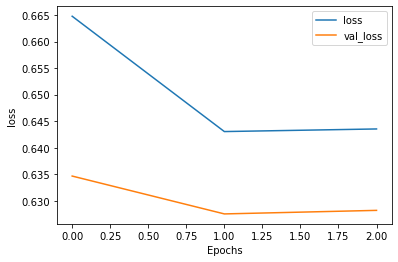

In [100]:
plot_graphs(history, 'loss')

In [101]:
test_input = np.load(open(DATA_IN_PATH + INPUT_TEST_DATA, 'rb'), allow_pickle=True)
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])
test_label = np.load(open(DATA_IN_PATH + LABEL_TEST_DATA, 'rb'), allow_pickle=True)

In [102]:
clf.load_weights(os.path.join(DATA_OUT_PATH, model_name, 'weights.h5'))
clf.evaluate(test_input, test_label)

9/9 [==============================] - 0s 8ms/step - loss: 0.6301 - Accuracy: 0.6786


[0.6301306486129761, 0.6785714030265808]